In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_layers = 12
n_neurons = 128
n_inputs = 3 
n_outputs = 1
size_train = 200*24
file_path_old = "../content/drive/My Drive/VDK/data/dananghour2019.csv"
file_path_new = []
file_path_new.append("../content/drive/My Drive/VDK/data/dananghour.csv")
file_path_new.append("../content/drive/My Drive/VDK/data/dananghour1.csv")
file_path_new.append( "../content/drive/My Drive/VDK/data/dananghour2.csv")
file_path_new.append( "../content/drive/My Drive/VDK/data/dananghour3.csv")
def read_data(file_path):
  data=pd.read_csv(file_path, delimiter=',',header=11,skipinitialspace=True, usecols=['Temperature', 'Relative Humidity', 'Mean Sea Level Pressure'] )
  X = np.array(data)
  return X
X = read_data(file_path_old)
# X_train = read_data(file_path_old)
# X_test = np.empty((0,n_inputs))
# for path in file_path_new:
#   data = read_data(path)
#   X_test = np.concatenate((X_test, data), axis = 0) 
# # temperature = np.array(data["Temperature"]).reshape(-1, 1)
# # relative_humidity = np.array(data["Relative Humidity"]).reshape(-1, 1)
# # MSLP = np.array(data["Mean Sea Level Pressure"]).reshape(-1, 1)
# # precipitation_total = np.array(data["Precipitation Total"]).reshape(-1, 1)
# # X = np.concatenate((temperature, relative_humidity, MSLP, precipitation_total), axis = 1)
y = X[1:, 0].reshape(-1, 1)

X_train = X[:size_train]
y_train = y[:size_train]


X_test = X[size_train: -24]
y_test = y[size_train: -23]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4800, 3) (4800, 1) (3936, 3) (3936, 1)


In [3]:
def create_batches(X, y, n_layer, n_input, n_output):
  X_batches = X.reshape(-1, n_layer, n_input)
  y_batches = y.reshape(-1, n_layer, n_output)
  return X_batches, y_batches
X_batches, y_batches = create_batches(X_train, y_train, n_layers, n_inputs, n_outputs)
X_test_batches, y_test_batches = create_batches(X_test, y_test, n_layers, n_inputs, n_outputs)
print(X_test_batches.shape, y_test_batches.shape)
print(X_train, y_train)

(328, 12, 3) (328, 12, 1)
[[  20.255566   83.19467  1022.2     ]
 [  20.075565   84.55421  1021.3     ]
 [  19.835566   84.368286 1020.9     ]
 ...
 [  32.075565   64.44161  1003.7     ]
 [  31.885567   64.712654 1004.2     ]
 [  31.695566   67.51986  1004.4     ]] [[20.075565]
 [19.835566]
 [19.895567]
 ...
 [31.885567]
 [31.695566]
 [31.355566]]


In [4]:

#Variable input and output
X = tf.placeholder(tf.float32, [None, n_layers, n_inputs])
y = tf.placeholder(tf.float32, [None, n_layers, n_outputs])
#Model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, c_states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)
stacked_rnn_output = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs =tf.layers.dense(stacked_rnn_output, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_layers, n_outputs])
#loss_function and optimizer
lr = 0.001
loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
trainning_op =optimizer.minimize(loss)
init = tf.global_variables_initializer()


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [5]:
#Trainning
epoches = 200000
saver = tf.train.Saver()
with tf.Session() as sess:
  init.run()
  for ep in range(epoches):
    print(ep)
    sess.run(trainning_op, feed_dict={X: X_batches, y: y_batches})
  y_pred = sess.run(outputs, feed_dict={X: X_test_batches})
  save_path = saver.save(sess, "../content/drive/My Drive/VDK/model_12layers_128neutrals/model.ckpt")

print(y_pred)

Streaming output truncated to the last 5000 lines.
195050
195051
195052
195053
195054
195055
195056
195057
195058
195059
195060
195061
195062
195063
195064
195065
195066
195067
195068
195069
195070
195071
195072
195073
195074
195075
195076
195077
195078
195079
195080
195081
195082
195083
195084
195085
195086
195087
195088
195089
195090
195091
195092
195093
195094
195095
195096
195097
195098
195099
195100
195101
195102
195103
195104
195105
195106
195107
195108
195109
195110
195111
195112
195113
195114
195115
195116
195117
195118
195119
195120
195121
195122
195123
195124
195125
195126
195127
195128
195129
195130
195131
195132
195133
195134
195135
195136
195137
195138
195139
195140
195141
195142
195143
195144
195145
195146
195147
195148
195149
195150
195151
195152
195153
195154
195155
195156
195157
195158
195159
195160
195161
195162
195163
195164
195165
195166
195167
195168
195169
195170
195171
195172
195173
195174
195175
195176
195177
195178
195179
195180
195181
195182
195183
195184
1951

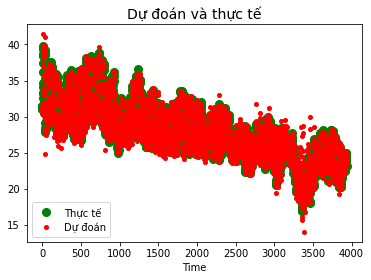

In [6]:
# saver = tf.train.Saver()
# with tf.Session() as sess:
#   sess.run(tf.global_variables_initializer())
#   save_path = saver.restore(sess, "../content/drive/My Drive/VDK/model/model.ckpt")
#   y_pred = sess.run(outputs, feed_dict={X: X_test_batches})
plt.title("Dự đoán và thực tế", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test_batches)), "bo", markersize=8, label="Thực tế", color='green')
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=8, label="Dự đoán", color='red')
plt.legend(loc="lower left")
plt.xlabel("Time")

plt.show()

In [7]:

mse = np.mean((y_test_batches - y_pred)*(y_test_batches-y_pred))
rmse = mse**0.5
print(mse, "\n", rmse)

0.7749632511008937 
 0.8803199708633752
